In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('./data/numerical_Data.csv')

In [13]:
df

,runtime_minutes,movie_averageRating,movie_numerOfVotes,approval_Index,Production budget $,Domestic gross $,Worldwide gross $,Action,Adventure,Animation,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,192.0,7.8,277543.0,7.061101,460000000,667830256,2265935552,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,181.0,8.4,1143642.0,8.489533,400000000,858373000,2794731755,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,137.0,6.6,533763.0,6.272064,379000000,241071802,1045713802,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,141.0,7.3,870573.0,7.214013,365000000,459005868,1395316979,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,149.0,8.4,1091968.0,8.460958,300000000,678815482,2048359754,1,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4375,100.0,7.2,110078.0,6.017902,65000,11529368,22233808,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4376,98.0,6.6,7986.0,4.231464,50000,10426506,10426506,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4377,93.0,4.9,1593.0,2.526405,50000,2335352,2335352,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4378,98.0,6.2,14595.0,4.242085,50000,391674,424149,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
X = df[['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $', 'Worldwide gross $']]

y = df.drop(columns=['runtime_minutes', 'movie_averageRating', 'movie_numerOfVotes', 'approval_Index', 'Production budget $', 'Domestic gross $', 'Worldwide gross $'])

print(X.shape)
print(y.shape)

(4380, 7)
(4380, 23)


In [5]:
X = np.asarray(X)
y = np.asarray(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(7,)),
    Dense(64, activation='relu'),
    Dense(23, activation='sigmoid')
])

c:\Users\marka\anaconda3\envs\DataMining11\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy'], 
    run_eagerly=True
)

In [10]:
model_history =  model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
66/66 - 2s - 23ms/step - accuracy: 0.1998 - loss: 633314.5625 - val_accuracy: 0.2603 - val_loss: 86883.3516
Epoch 2/200
66/66 - 1s - 21ms/step - accuracy: 0.2295 - loss: 65971.5234 - val_accuracy: 0.2763 - val_loss: 62924.0039
Epoch 3/200
66/66 - 1s - 19ms/step - accuracy: 0.2355 - loss: 46805.0820 - val_accuracy: 0.2237 - val_loss: 49535.2539
Epoch 4/200
66/66 - 1s - 20ms/step - accuracy: 0.2199 - loss: 42298.2305 - val_accuracy: 0.2158 - val_loss: 34918.4414
Epoch 5/200
66/66 - 1s - 20ms/step - accuracy: 0.2275 - loss: 33507.1523 - val_accuracy: 0.2603 - val_loss: 35948.9805
Epoch 6/200
66/66 - 1s - 20ms/step - accuracy: 0.2424 - loss: 30517.8145 - val_accuracy: 0.1610 - val_loss: 29945.1914
Epoch 7/200
66/66 - 1s - 19ms/step - accuracy: 0.2203 - loss: 30107.9297 - val_accuracy: 0.3071 - val_loss: 28960.3535
Epoch 8/200
66/66 - 1s - 21ms/step - accuracy: 0.2253 - loss: 26176.7949 - val_accuracy: 0.2180 - val_loss: 30974.7559
Epoch 9/200
66/66 - 1s - 19ms/step - accuracy: 

In [ ]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

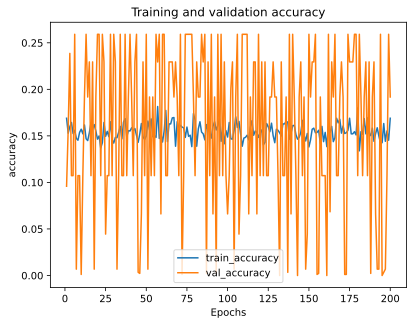

In [ ]:
plot_metric(model_history, 'accuracy')

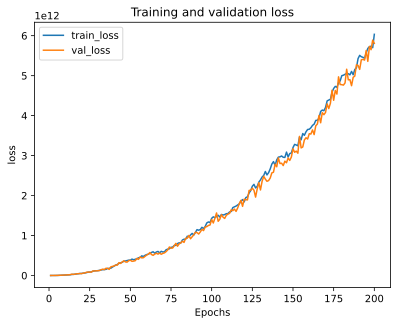

In [ ]:
plot_metric(model_history, 'loss')